In [8]:
#Dependencies
import pickle
import numpy
import keras
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

In [67]:
filehandler = open("save.p", 'rb') 
object = pickle.load(filehandler)
#object = object[0]

input_premiums = [x for x in range(100, 115, 1)]
print(input_premiums)
expected_inps = []
expected = []

prices = object[0]
probs = object[1]

prev_diff = 10000000
prev_val = 0
current_index = 0

[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114]


In [68]:
for price in prices:
	if current_index == len(input_premiums):
		break
	diff = input_premiums[current_index] - price
	if diff < 0:
		expected_inps.append(prev_val)
		current_index += 1
	prev_diff = diff
	prev_val = price

x = zip(prices, probs)
counter = 0
for i in x:
	if counter == len(expected_inps):
		break
	if i[0] == expected_inps[counter]:
		expected.append(i[1])
		counter += 1

if len(input_premiums) is not len(expected):
	print("fudck wrong lens")

input_train = input_premiums #[exp]
expected_train = expected


In [69]:
classifier = Sequential()
    
# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 25, activation = 'relu'))
    
# Adding the second hidden layer
classifier.add(Dense(units = 64, activation = 'relu'))
classifier.add(Dense(units = 64, activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 1, activation = 'sigmoid'))
    
# Compiling the ANN
classifier.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

History = classifier.fit(x = input_train, y = expected_train, batch_size = 26, epochs = 1000, verbose = 0)


In [70]:
y_pred = classifier.predict(input_train)

In [71]:
y_pred

array([[4.9646686e-11],
       [3.9173813e-11],
       [3.0910167e-11],
       [2.4389726e-11],
       [1.9244760e-11],
       [1.5185112e-11],
       [1.1981842e-11],
       [9.4543132e-12],
       [7.4599285e-12],
       [5.8862711e-12],
       [4.6445907e-12],
       [3.6648089e-12],
       [2.8917355e-12],
       [2.2817249e-12],
       [1.8004028e-12]], dtype=float32)

In [72]:
len(expected_train)

15

In [58]:
len(y_pred)

15

In [59]:
len(input_train)

15

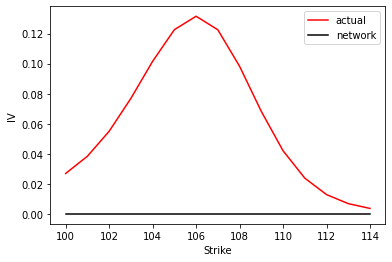

In [62]:
plt.plot(input_train, expected_train, 'r', input_train, y_pred, "k-")

plt.legend(["actual", "network"], loc="best")
plt.xlabel("Strike")
plt.ylabel("IV")
plt.show()